<a class="anchor" id="0"></a>
# **Naive Bayes Classifier in Python**


Hello friends,

In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. In this kernel, I implement Naive Bayes Classification algorithm with Python and Scikit-Learn. I build a Naive Bayes Classifier to predict whether a person makes over 50K a year.

So, let's get started.

**As always, I hope you find this kernel useful and your <font color="red"><b>UPVOTES</b></font> would be highly appreciated**.


<a class="anchor" id="0.1"></a>
# **Table of Contents**

1.	[Introduction to Naive Bayes algorithm](#1)
2.	[Naive Bayes algorithm intuition](#2)
3.	[Types of Naive Bayes algorithm](#3)
4.	[Applications of Naive Bayes algorithm](#4)
5.	[Import libraries](#5)
6.	[Import dataset](#6)
7.	[Exploratory data analysis](#7)
8.	[Declare feature vector and target variable](#8)
9.	[Split data into separate training and test set](#9)
10.	[Feature engineering](#10)
11.	[Feature scaling](#11)
12.	[Model training](#12)
13.	[Predict the results](#13)
14.	[Check accuracy score](#14)
15.	[Confusion matrix](#15)
16.	[Classification metrices](#16)
17.	[Calculate class probabilities](#17)
18.	[ROC - AUC](#18)
19.	[k-Fold Cross Validation](#19)
20.	[Results and conclusion](#20)
21. [References](#21)


# **1. Introduction to Naive Bayes algorithm** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features.  Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.


Naïve Bayes models are also known as `simple Bayes` or `independent Bayes`. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning.


# **2. Types of Naive Bayes algorithm** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


There are 3 types of Naïve Bayes algorithm. The 3 types are listed below:-

  1. Gaussian Naïve Bayes

  2. Multinomial Naïve Bayes

  3. Bernoulli Naïve Bayes

These 3 types of algorithm are explained below.


## **Gaussian Naïve Bayes algorithm**


When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution. For example, suppose the training data contains a continuous attribute x. We first segment the data by the class, and then compute the mean and variance of x in each class. Let µi be the mean of the values and let σi be the variance of the values associated with the ith class. Suppose we have some observation value xi . Then, the probability distribution of xi given a class can be computed by the following equation –


![Gaussian Naive Bayes algorithm](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEWCcq1XtC1Yw20KWSHn2axYa7eY-a0T1TGtdVn5PvOpv9wW3FeA&s)

## **Multinomial Naïve Bayes algorithm**

With a Multinomial Naïve Bayes model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial (p1, . . . ,pn) where pi is the probability that event i occurs. Multinomial Naïve Bayes algorithm is preferred to use on data that is multinomially distributed. It is one of the standard algorithms which is used in text categorization classification.

## **Bernoulli Naïve Bayes algorithm**

In the multivariate Bernoulli event model, features are independent boolean variables (binary variables) describing inputs. Just like the multinomial model, this model is also popular for document classification tasks where binary term occurrence features are used rather than term frequencies.

**Summary of Differences**

**Gaussian Naïve Bayes:** Assumes continuous features with a Gaussian distribution.

**Example**
Predicting whether a person has a certain disease based on continuous features like age, blood pressure, and cholesterol levels.

**Multinomial Naïve Bayes:** Assumes discrete features representing counts, suitable for text data where word frequencies are used.

**Example** Classifying emails into spam or non-spam based on word frequencies in the email content.

**Bernoulli Naïve Bayes:** Assumes binary features, suitable for text data where the presence or absence of words is used.

**Example** Classifying documents based on the presence or absence of certain words, suitable for binary text features like keyword occurrences



# **3. Applications of Naive Bayes algorithm** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)



Naïve Bayes is one of the most straightforward and fast classification algorithm. It is very well suited for large volume of data. It is successfully used in various applications such as :

1. Spam filtering
2. Text classification
3. Sentiment analysis
4. Recommender systems

It uses Bayes theorem of probability for prediction of unknown class.


# **. Import libraries** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
cd /content/drive/MyDrive/Machine learning 2024/Notebooks - Machine Learning/Naive bayes

/content/drive/MyDrive/Machine learning 2024/Notebooks - Machine Learning/Naive bayes


In [90]:
import warnings

warnings.filterwarnings('ignore')

# **6. Import dataset** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

In [91]:
data = 'adult.csv'

df = pd.read_csv(data, header=None, sep=',\s')   # sep=',\s': This parameter specifies the delimiter to use. The string ',\s' means that the values in the CSV file are separated by a comma followed by a whitespace character

# **7. Exploratory data analysis** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)


Now, I will explore the data to gain insights about the data.

In [92]:
# view dimensions of dataset

df.shape

(32561, 15)

We can see that there are 32561 instances and 15 attributes in the data set.

### View top 5 rows of dataset

In [93]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [94]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [95]:
# let's again preview the dataset

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [96]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see that there are no missing values in the dataset. I will confirm this further.

### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.


First of all, I will explore categorical variables.

### Explore categorical variables

In [97]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [98]:
# view the categorical variables

df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


### Summary of categorical variables


- There are 9 categorical variables.


- The categorical variables are given by `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country` and `income`.


- `income` is the target variable.

### Explore problems within categorical variables


First, I will explore the categorical variables.


### Missing values in categorical variables

In [99]:
# check missing values in categorical variables

df[categorical].isnull().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0
income,0


We can see that there are no missing values in the categorical variables. I will confirm this further.

### Frequency counts of categorical variables


Now, I will check the frequency counts of categorical variables.

In [100]:
# view frequency counts of values in categorical variables

for var in categorical:

    print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

Now, we can see that there are several variables like `workclass`, `occupation` and `native_country` which contain missing values. Generally, the missing values are coded as `NaN` and python will detect them with the usual command of `df.isnull().sum()`.

But, in this case the missing values are coded as `?`. Python fail to detect these as missing values because it do not consider `?` as missing values. So, I have to replace `?` with `NaN` so that Python can detect these missing values.

I will explore these variables and replace `?` with `NaN`.

### Explore workclass variable

In [101]:
# check labels in workclass variable

df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [102]:
# check frequency distribution of values in workclass variable

df.workclass.value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


We can see that there are 1836 values encoded as `?` in workclass variable. I will replace these `?` with `NaN`.

In [103]:
# replace '?' values in workclass variable with `NaN`


df['workclass'].replace('?', np.NaN, inplace=True)

In [104]:
# again check the frequency distribution of values in workclass variable

df.workclass.value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


Now, we can see that there are no values encoded as `?` in the `workclass` variable.

I will adopt similar approach with `occupation` and `native_country` column.

### Explore occupation variable

In [105]:
# check labels in occupation variable

df.occupation.unique()


array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [106]:
# check frequency distribution of values in occupation variable

df.occupation.value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


We can see that there are 1843 values encoded as `?` in `occupation` variable. I will replace these `?` with `NaN`.

In [107]:
# replace '?' values in occupation variable with `NaN`

df['occupation'].replace('?', np.NaN, inplace=True)


In [108]:
# again check the frequency distribution of values in occupation variable

df.occupation.value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
Transport-moving,1597
Handlers-cleaners,1370


### Explore native_country variable


In [109]:
# check labels in native_country variable

df.native_country.unique()


array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [110]:
# check frequency distribution of values in native_country variable

df.native_country.value_counts()


,count
native_country,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


We can see that there are 583 values encoded as `?` in `native_country` variable. I will replace these `?` with `NaN`.


In [111]:
# replace '?' values in native_country variable with `NaN`

df['native_country'].replace('?', np.NaN, inplace=True)

In [112]:
# again check the frequency distribution of values in native_country variable

df.native_country.value_counts()

,count
native_country,
United-States,29170
Mexico,643
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


### Check missing values in categorical variables again

In [113]:
df[categorical].isnull().sum()

,0
workclass,1836
education,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0
native_country,583
income,0


Now, we can see that `workclass`, `occupation` and `native_country` variable contains missing values.

### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [114]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


We can see that `native_country` column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

### Explore Numerical Variables

In [115]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [116]:
# view the numerical variables

df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


### Summary of numerical variables


- There are 6 numerical variables.


- These are given by `age`, `fnlwgt`, `education_num`, `capital_gain`, `capital_loss` and `hours_per_week`.


- All of the numerical variables are of discrete data type.

### Explore problems within numerical variables


Now, I will explore the numerical variables.


### Missing values in numerical variables

In [117]:
# check missing values in numerical variables

df[numerical].isnull().sum()

,0
age,0
fnlwgt,0
education_num,0
capital_gain,0
capital_loss,0
hours_per_week,0


We can see that all the 6 numerical variables do not contain missing values.

# **8. Declare feature vector and target variable** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In [118]:
X = df.drop(['income'], axis=1)

y = df['income']

# **9. Split data into separate training and test set** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

In [119]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [120]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((26048, 14), (6513, 14))

# **10. Feature Engineering** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will display the categorical and numerical variables again separately.

In [121]:
# check data types in X_train

X_train.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [122]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [123]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### Engineering missing values in categorical variables

In [124]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

,0
workclass,0.055974
education,0.000000
marital_status,0.000000
occupation,0.056204
relationship,0.000000
race,0.000000
sex,0.000000
native_country,0.018312


In [125]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.05597358722358722
occupation 0.056203931203931204
native_country 0.018312346437346437


In [126]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

In [127]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


In [128]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


As a final check, I will check for missing values in X_train and X_test.

In [129]:
# check missing values in X_train

X_train.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [130]:
# check missing values in X_test

X_test.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


We can see that there are no missing values in X_train and X_test.

### Encode categorical variables

In [131]:
# print categorical variables

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [132]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
15282,Private,11th,Divorced,Transport-moving,Not-in-family,White,Male,United-States
24870,Private,HS-grad,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
18822,Private,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
26404,Private,HS-grad,Married-civ-spouse,Sales,Wife,Black,Female,United-States
7842,Self-emp-not-inc,Assoc-voc,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States


In [133]:
!pip install category_encoders

In [134]:
# import category encoders

import category_encoders as ce

In [135]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [136]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
15282,36,1,0,0,0,0,0,0,0,174308,...,0,0,0,0,0,0,0,0,0,0
24870,35,1,0,0,0,0,0,0,0,198202,...,0,0,0,0,0,0,0,0,0,0
18822,38,1,0,0,0,0,0,0,0,52963,...,0,0,0,0,0,0,0,0,0,0
26404,50,1,0,0,0,0,0,0,0,138270,...,0,0,0,0,0,0,0,0,0,0
7842,68,0,1,0,0,0,0,0,0,116903,...,0,0,0,0,0,0,0,0,0,0


In [137]:
X_train.shape

(26048, 105)

We can see that from the initial 14 columns, we now have 113 columns.

Similarly, I will take a look at the `X_test` set.

In [138]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [139]:
X_test.shape

(6513, 105)

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

# **11. Feature Scaling** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)

In [140]:
cols = X_train.columns

In [141]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


**What is RobustScaler?**

RobustScaler is used to scale features using statistics that are robust to outliers. Specifically, it removes the median and scales the data according to the interquartile range (IQR), which is the range between the 1st quartile (25th percentile) and the 3rd quartile (75th percentile).

**Key Features of RobustScaler**

Centering and Scaling: It centers the data by subtracting the median and then scales it by dividing by the IQR.

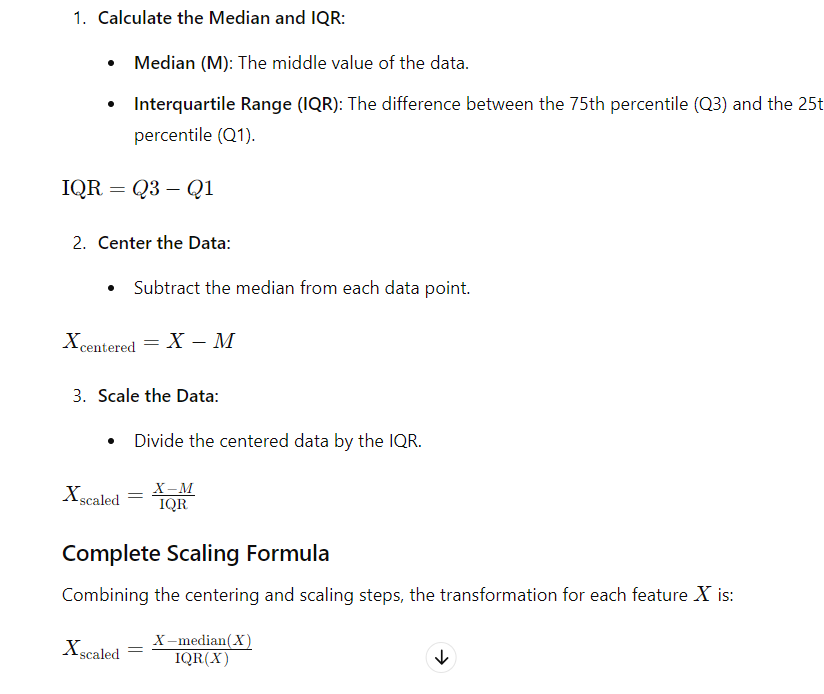
Robust to Outliers: Unlike standard scaling (which uses the mean and standard deviation), RobustScaler is less sensitive to outliers because it uses the median and IQR.

In [142]:
X_train

array([[-0.05263158,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.10526316,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05263158,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.73684211,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.42105263, -1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.63157895,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [143]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [144]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [145]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.030971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.169550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.049314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.684211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.631579,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.512721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now have `X_train` dataset ready to be fed into the Gaussian Naive Bayes classifier. I will do it as follows.

# **12. Model training** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)

In [149]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()

In [150]:
# Apply GaussianNB with grid search and print results with the best estimator

import numpy as np
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

grid = GridSearchCV(estimator=gnb,
                    param_grid=param_grid,
                    cv=5,
                    verbose=1,
                    scoring='accuracy')

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

best_nv=grid.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 3.5111917342151273e-09}
GaussianNB(var_smoothing=3.5111917342151273e-09)


# **13. Predict the results** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [151]:
y_pred = best_nv.predict(X_test)

y_pred

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '>50K', '<=50K'],
      dtype='<U5')

# **14. Check accuracy score** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)

In [152]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8270


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [153]:
y_pred_train = best_nv.predict(X_train)

y_pred_train

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype='<U5')

In [154]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8294


### Check for overfitting and underfitting

In [155]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(best_nv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(best_nv.score(X_test, y_test)))

Training set score: 0.8294
Test set score: 0.8270


The training-set accuracy score is 0.8067 while the test-set accuracy to be 0.8083. These two values are quite comparable. So, there is no sign of overfitting.


# **15. Confusion matrix** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [156]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4467  451]
 [ 676  919]]

True Positives(TP) =  4467

True Negatives(TN) =  919

False Positives(FP) =  451

False Negatives(FN) =  676


The confusion matrix shows `5999 + 1897 = 7896 correct predictions` and `1408 + 465 = 1873 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 5999


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 1897


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1408 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 465 `(Type II error)`

<Axes: >

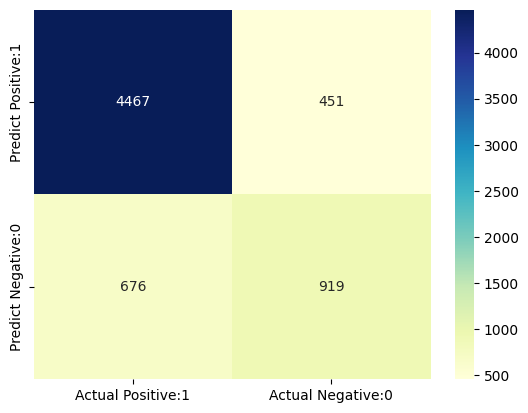

In [157]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **16. Classification metrices** <a class="anchor" id="16"></a>

[Table of Contents](#0.1)

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [158]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       <=50K     0.8686    0.9083    0.8880      4918
        >50K     0.6708    0.5762    0.6199      1595

    accuracy                         0.8270      6513
   macro avg     0.7697    0.7422    0.7539      6513
weighted avg     0.8201    0.8270    0.8223      6513



### Classification accuracy

In [159]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [160]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8270


### Classification error

In [161]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1730


### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.



In [162]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9083


### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN)`.



In [163]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8686


### True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [164]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8686


### False Positive Rate

In [165]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3292


### Specificity

In [166]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6708


### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to
compare classifier models, not global accuracy.




### Support


**Support** is the actual number of occurrences of the class in our dataset.

# **17. Calculate class probabilities** <a class="anchor" id="17"></a>

[Table of Contents](#0.1)

### Observations


- In each row, the numbers sum to 1.


- There are 2 columns which correspond to 2 classes - `<=50K` and `>50K`.

    - Class 0 => <=50K - Class that a person makes less than equal to 50K.    
    
    - Class 1 => >50K  - Class that a person makes more than 50K.
        
    
- Importance of predicted probabilities

    - We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.


- predict_proba process

    - Predicts the probabilities    
    
    - Choose the class with the highest probability    
    
    
- Classification threshold level

    - There is a classification threshold level of 0.5.    
    
    - Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.    
    
    - Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.    
    


In [170]:
# prompt: need to apply bernouli and multinomial NV with grid search with results for test accuracy

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
# Bernoulli Naive Bayes
bnb = BernoulliNB()

param_grid_bnb = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

grid_bnb = GridSearchCV(estimator=bnb,
                        param_grid=param_grid_bnb,
                        cv=5,
                        verbose=1,
                        scoring='accuracy')

grid_bnb.fit(X_train, y_train)

print("Bernoulli Naive Bayes - Best Parameters:", grid_bnb.best_params_)
print("Bernoulli Naive Bayes - Best Estimator:", grid_bnb.best_estimator_)

best_B=grid_bnb.best_estimator_

y_pred_bnb = best_B.predict(X_test)

print('Bernoulli Naive Bayes - Test Accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_bnb)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Bernoulli Naive Bayes - Best Parameters: {'alpha': 0.5}
Bernoulli Naive Bayes - Best Estimator: BernoulliNB(alpha=0.5)
Bernoulli Naive Bayes - Test Accuracy: 0.7873


In [172]:
# prompt: scaling min max scaler for X_train and x_test

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [173]:
# Multinomial Naive Bayes
mnb = MultinomialNB()

param_grid_mnb = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

grid_mnb = GridSearchCV(estimator=mnb,
                        param_grid=param_grid_mnb,
                        cv=5,
                        verbose=1,
                        scoring='accuracy')

grid_mnb.fit(X_train_scaled, y_train)

print("Multinomial Naive Bayes - Best Parameters:", grid_mnb.best_params_)
print("Multinomial Naive Bayes - Best Estimator:", grid_mnb.best_estimator_)

best_M=grid_mnb.best_estimator_

y_pred_mnb = grid_mnb.predict(X_test_scaled)
print('Multinomial Naive Bayes - Test Accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_mnb)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Multinomial Naive Bayes - Best Parameters: {'alpha': 10.0}
Multinomial Naive Bayes - Best Estimator: MultinomialNB(alpha=10.0)
Multinomial Naive Bayes - Test Accuracy: 0.7915


# **19. k-Fold Cross Validation** <a class="anchor" id="19"></a>

[Table of Contents](#0.1)

In [168]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_nv, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.83685221 0.83761996 0.83992322 0.81957774 0.83915547 0.82111324
 0.82495202 0.82802303 0.82066052 0.82795699]


We can summarize the cross-validation accuracy by calculating its mean.

In [169]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8296


# **21. References** <a class="anchor" id="21"></a>

[Table of Contents](#0.1)



The work done in this project is inspired from following books and websites:-

1. Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

2. Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

3. Udemy course – Machine Learning – A Z by Kirill Eremenko and Hadelin de Ponteves

4. https://en.wikipedia.org/wiki/Naive_Bayes_classifier

5. http://dataaspirant.com/2017/02/06/naive-bayes-classifier-machine-learning/

6. https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

7. https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/

8. https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html